# SciPy - Βιβλιοθήκη επιστημονικών αλγορίθμων για Python

In [1]:
# τι είναι αυτή η γραμμή; Απάντηση στη διάλεξη 4
import matplotlib.pyplot as plt

## Γραμμική άλγεβρα

Η ενότητα γραμμικής άλγεβρας περιέχει πολλές συναρτήσεις που σχετίζονται με τους πίνακες, συμπεριλαμβανομένης της επίλυσης γραμμικών εξισώσεων, εύρεση ιδιοτιμών, συναρτήσεων πινάκων (για παράδειγμα, εκθέτης πίνακα) κ.λπ.

Λεπτομερής τεκμηρίωση είναι διαθέσιμη στη διεύθυνση: http://docs.scipy.org/doc/scipy/reference/linalg.html

Εδώ θα δούμε πώς να χρησιμοποιήσετε μερικές από αυτές τις λειτουργίες:



### Συστήματα γραμμικών εξισώσεων

Γραμμικά συστήματα εξισώσεων σε μορφή πίνακα
$A x = b$

όπου $A$ είναι ένας πίνακας και $x,b$ είναι διανύσματα μπορούν να λυθούν όπως:

In [2]:
from numpy import *

In [3]:
from scipy.linalg import *

In [4]:
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])

In [5]:
x = solve(A, b)

x

C:\Users\tdiak_000\AppData\Local\Temp\ipykernel_1616\4220959802.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  x = solve(A, b)


array([-0.23333333,  0.46666667,  0.1       ])

In [6]:
# έλεγχος
dot(A, x) - b

array([ 0.00000000e+00, -2.22044605e-16,  0.00000000e+00])

Μπορούμε επίσης να κάνουμε το ίδιο με

$A X = B$

όπου τα $A, B, X$ είναι πίνακες:

In [7]:
A = random.rand(3,3)
B = random.rand(3,3)

In [8]:
X = solve(A, B)

In [9]:
X

array([[ 0.17480609, -1.47230056, -0.73653321],
       [ 0.21403704,  1.72043173,  1.56333386],
       [ 0.08563558,  0.13120788, -1.10556794]])

In [10]:
# έλεγχος
(dot(A, X) - B)

array([[ 0.00000000e+00, -1.11022302e-16,  5.55111512e-17],
       [-5.55111512e-17,  0.00000000e+00, -4.16333634e-17],
       [ 0.00000000e+00, -1.11022302e-16,  5.55111512e-17]])

### Ιδιοτιμές και ιδιοδιανύσματα

Το πρόβλημα της ιδιοτιμής για έναν πίνακα $A$:

$\displaystyle A v_n = \lambda_n v_n$

όπου $v_n$ είναι το $n$-στο ιδιοδιάνυσμα και $\lambda_n$ είναι η $n$-οστη ιδιοτιμή.

Για να υπολογίσετε τις ιδιοτιμές ενός πίνακα, χρησιμοποιήστε τα «eigvals» και για τον υπολογισμό τόσο των ιδιοτιμών όσο και των ιδιοδιανυσμάτων χρησιμοποιήστε τη συνάρτηση «eig»:

In [11]:
evals = eigvals(A)

In [12]:
evals

array([ 1.66135083+0.j,  0.25541802+0.j, -0.1800655 +0.j])

In [13]:
evals, evecs = eig(A)

In [14]:
evals

array([ 1.66135083+0.j,  0.25541802+0.j, -0.1800655 +0.j])

In [15]:
evecs

array([[-0.62921348, -0.8145558 ,  0.24121095],
       [-0.72447519,  0.22162967, -0.63400071],
       [-0.2814713 ,  0.53607754,  0.73475191]])

Τα ιδιοδιανύσματα που αντιστοιχούν στην ιδιοτιμή $n$th (αποθηκευμένα στο `evals[n]`) είναι η $n$th *στήλη* στο `evecs`, δηλ., `evecs[:,n]`. Για να το επαληθεύσουμε, ας προσπαθήσουμε να πολλαπλασιάσουμε τα ιδιοδιανύσματα με το πίνακα και να συγκρίνουμε με το γινόμενο του ιδιοδιανύσματος και της ιδιοτιμής:

In [16]:
n = 1

(dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

array([-2.77555756e-16+0.j, -2.08166817e-17+0.j,  5.55111512e-17+0.j])

Υπάρχουν επίσης πιο εξειδικευμένοι ιδιολύτες, όπως το «eigh» για ερμιτιανούς πίνακες.

### Πράξεις πινάκων

In [35]:
# η αντίστροφη πίνακα
inv(A)

array([[ -7.32386241,  -6.0245535 ,  15.82103712],
       [  5.00185332,  15.38921489, -20.72344605],
       [  7.13727324,   2.61090939, -10.61998366]])

In [36]:
# Ορίζουσα
det(A)

-0.0062747181828320025

In [37]:
# μέτρα διαφόρων βαθμών
norm(A, ord=2), norm(A, ord=Inf)

(1.5146033562647023, 1.5725909960708295)

### Άσκηση

Έστω ότι ένα κβαντικό σύστημα περιγράφεται από τον εξής Χαμιλτονιανό πίνακα:
$$
H = \begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$


(Μπορεί να προκύψει από την περιγραφή ενός συστήματος τριών καταστάσεων με αλληλεπιδράσεις μόνο μεταξύ γειτονικών καταστάσεων.)

  1.  Υπολογίστε τις ιδιοτιμές και τα ιδιοδιανύσματα του $H$ χρησιμοποιώντας τη **scipy.linalg.eig**.
  2.  Επιβεβαιώστε ότι τα ιδιοδιανύσματα είναι ορθογώνια υπολογίζοντας το εσωτερικό τους γινόμενο.
  3.  Κατασκευάστε μια τυχαία αρχική κβαντική κατάσταση $\ket{\psi(0)}$ και εξετάστε πώς εξελίσσεται στον χρόνο από τη σχέση:

$$ \ket{\psi(t)} = e^{-i H t} \ket{\psi(0)} $$

 Το  $e^{-i H t}$ μπορεί να υπολογιστεί από τη συνάρτηση **scipy.linalg.expm**.

Ιδιοτιμές:
[-1.41421356e+00 -2.77516890e-17  1.41421356e+00]

Ιδιοδιανύσματα:
[[ 5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01 -6.54358164e-17  7.07106781e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]]

Έλεγχος ορθογωνιότητας (πρέπει να είναι ο μοναδιαίος πίνακας):
[[ 1.00000000e+00 -1.62588398e-17 -2.49800181e-16]
 [-1.62588398e-17  1.00000000e+00 -1.11022302e-16]
 [-2.49800181e-16 -1.11022302e-16  1.00000000e+00]]


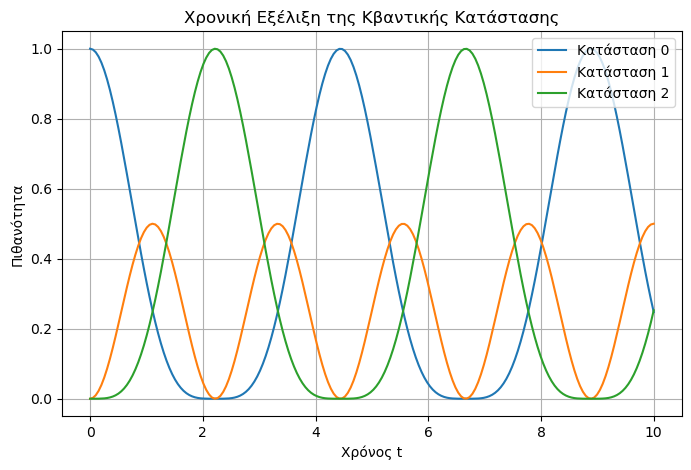

In [18]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Ορισμός της Χαμιλτονιανής
H = np.array([[0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]])

# Υπολογισμός ιδιοτιμών και ιδιοδιανυσμάτων
values, vectors = la.eig(H)

# Εκτύπωση αποτελεσμάτων
print("Ιδιοτιμές:")
print(values.real)
print("\nΙδιοδιανύσματα:")
print(vectors)

# Επιβεβαίωση ορθογωνιότητας των ιδιοδιανυσμάτων
orthogonality = np.dot(vectors.T.conj(), vectors)
print("\nΈλεγχος ορθογωνιότητας (πρέπει να είναι ο μοναδιαίος πίνακας):")
print(orthogonality.real)

# Επιλογή αρχικής κβαντικής κατάστασης
psi_0 = np.array([1, 0, 0])  # Τυπικά μια βάση

# Διακριτές χρονικές στιγμές
t_values = np.linspace(0, 10, 200)
psi_t = np.zeros((3, len(t_values)), dtype=complex)

# Υπολογισμός χρονικής εξέλιξης: e^(-i H t) * psi_0

for i in range(len(t_values)):  # Ή t_values.shape[0]
    t = t_values[i]  # Παίρνουμε την αντίστοιχη χρονική στιγμή
    U_t = la.expm(-1j * H * t)  # Υπολογισμός του πίνακα εξέλιξης
    psi_t[:, i] = U_t @ psi_0  # Εφαρμογή στην αρχική κατάσταση
#    psi_t[:, i] = np.dot(U_t, psi_0)  # Διαφορετικά η τελευταία σειρά

# Οπτικοποίηση της πιθανότητας ύπαρξης σε κάθε κατάσταση
plt.figure(figsize=(8, 5))
for i in range(3):
    plt.plot(t_values, np.abs(psi_t[i, :])**2, label=f'Κατάσταση {i}')
plt.xlabel('Χρόνος t')
plt.ylabel('Πιθανότητα')
plt.legend()
plt.title('Χρονική Εξέλιξη της Κβαντικής Κατάστασης')
plt.grid()
plt.show()

## Βελτιστοποίηση

Η βελτιστοποίηση (εύρεση ελάχιστων ή μεγίστων μιας συνάρτησης) είναι ένα μεγάλο πεδίο στα μαθηματικά και η βελτιστοποίηση περίπλοκων συναρτήσεων ή πολλών μεταβλητών μπορεί μάλλον να εμπλέκεται. Εδώ θα δούμε μόνο μερικές πολύ απλές περιπτώσεις. Για μια πιο λεπτομερή εισαγωγή στη βελτιστοποίηση με το SciPy, δείτε: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

Για να χρησιμοποιήσετε τη λειτουργική μονάδα βελτιστοποίησης στο scipy πρώτα συμπεριλάβετε την ενότητα «optimize»:

In [10]:
from scipy import optimize

### Εύρεση ελάχιστων

Ας δούμε πρώτα πώς να βρούμε τα ελάχιστα μιας απλής συνάρτησης μιας μεμονωμένης μεταβλητής:

In [11]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

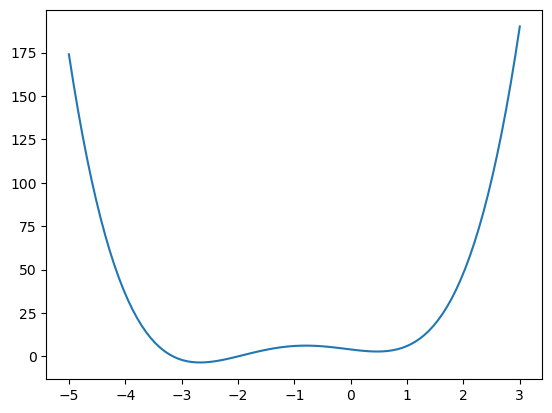

In [12]:
fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση `fmin_bfgs` για να βρούμε τα ελάχιστα μιας συνάρτησης:

In [26]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.6729815])

In [26]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

Μπορούμε επίσης να χρησιμοποιήσουμε τις συναρτήσεις «brent» ή «fminbound». Έχουν λίγο διαφορετική σύνταξη και χρησιμοποιούν διαφορετικούς αλγόριθμους.

In [27]:
optimize.brent(f)

0.46961743402759754

In [28]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Εύρεση λύσης σε μια συνάρτηση

Για να βρούμε τη ρίζα για μια συνάρτηση της μορφής $f(x) = 0$ μπορούμε να χρησιμοποιήσουμε τη συνάρτηση `fsolve`. Απαιτεί μια αρχική υπόθεση:

In [4]:
import numpy as np
from scipy.optimize import fsolve

# Ορισμός της συνάρτησης f(x) = x^2 - 4
def func(x):
    return x**2 - 4

# Επιλογή αρχικής εκτίμησης (π.χ. 3 για να βρούμε το x=2)
initial_guess = 3

# Εύρεση της ρίζας
solution = fsolve(func, initial_guess)

print("Η ρίζα της εξίσωσης είναι:", solution[0])


Η ρίζα της εξίσωσης είναι: 2.0000000000000084


## Παρεμβολή

Η παρεμβολή είναι απλή και βολική στην scipy: Η συνάρτηση «interp1d», όταν δίνονται arrays που περιγράφουν δεδομένα X και Y, επιστρέφει ένα αντικείμενο που συμπεριφέρεται σαν μια συνάρτηση που μπορεί να κληθεί για μια αυθαίρετη τιμή x (στο εύρος που καλύπτεται από το X). και επιστρέφει την αντίστοιχη παρεμβαλλόμενη τιμή y:

In [2]:
from scipy.interpolate import *

In [16]:
def f(x):
    return sin(x)

In [17]:
from numpy import *
n = arange(0, 10)  
x = linspace(0, 9, 100)

y_meas = f(n) + 0.1 * random.randn(len(n)) # προσομοίωση μέτρησης με θόρυβο
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

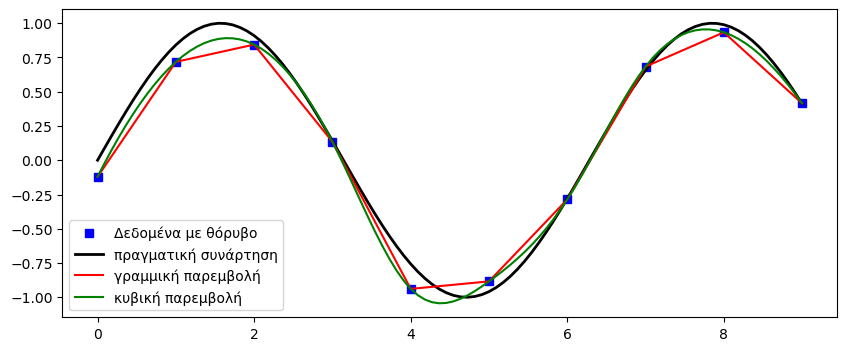

In [18]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='Δεδομένα με θόρυβο')
ax.plot(x, y_real, 'k', lw=2, label='πραγματική συνάρτηση')
ax.plot(x, y_interp1, 'r', label='γραμμική παρεμβολή')
ax.plot(x, y_interp2, 'g', label='κυβική παρεμβολή')
ax.legend(loc=3);

## Στατιστική

Η ενότητα `scipy.stats` περιέχει μεγάλο αριθμό στατιστικών κατανομών, στατιστικών συναρτήσεων και τέστ. Για μια πλήρη τεκμηρίωση των δυνατοτήτων του, ανατρέξτε στη διεύθυνση http://docs.scipy.org/doc/scipy/reference/stats.html.

Υπάρχει επίσης ένα πολύ ισχυρό πακέτο python για στατιστική μοντελοποίηση που ονομάζεται statsmodels. Δείτε http://statsmodels.sourceforge.net για περισσότερες λεπτομέρειες.

## Περαιτέρω ανάγνωση

* http://www.scipy.org - Η επίσημη ιστοσελίδα για το έργο SciPy.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - Ένα σεμινάριο για το πώς να ξεκινήσετε να χρησιμοποιείτε το SciPy.
* https://github.com/scipy/scipy/ - Ο πηγαίος κώδικας SciPy.